In [14]:
# Basic set-up
import os
import numpy as np
import pandas as pd

# ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [3]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [4]:
display(fake.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
display(real.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
display(fake.info())
print('\n')
display(real.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [8]:
display(fake.subject.value_counts())
print('\n')
display(real.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [9]:
fake['label'] = 'fake'
real['label'] = 'real'

In [10]:
data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)

,title,text,date,label
0,BREAKING: HUGE LEGAL VICTORY FOR AMERICANS Who...,A big slap in the face to an overreaching gove...,"Sep 22, 2015",fake
1,Italy national election likely set for March 4...,ROME (Reuters) - Italy s parliament will be di...,"December 13, 2017",real
2,U.S. Treasury dashes hopes for near-term World...,WASHINGTON (Reuters) - A U.S. Treasury officia...,"October 11, 2017",real
3,Millionaire Sean Hannity Tried To Fake Being ...,Fox News host and Donald Trump cheerleader Sea...,"September 28, 2016",fake
4,SLEEZY DEMOCRAT SENATOR Caught Fabricating Sto...,Liberal Delaware Sen. Chris Coons caused a sti...,"Mar 7, 2017",fake
...,...,...,...,...
44893,Model who alleges Trump's agency defrauded her...,NEW YORK (Reuters) - A Jamaican fashion model ...,"April 7, 2016",real
44894,"BREAKING REPORT: HILLARY SUPPORTER, CEO Of Las...","On August 15, 2017, Jim Murren, CEO of MGM whi...","Oct 4, 2017",fake
44895,Russia undermining action against chemical wea...,LONDON (Reuters) - British Foreign Secretary B...,"October 27, 2017",real
44896,WATCH: Trump’s Treasury Sec. Steve Mnuchin Sa...,Donald Trump is clearly violating the free spe...,"September 24, 2017",fake


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

print("\nThere are {} documents in the training data.".format(len(X_train)))

10994    WASHINGTON (Reuters) - President Donald Trump ...
4776     On Friday, Donald Trump got himself amped up f...
42204    Earlier this year, Jason Chaffetz, the House O...
22564    Boom! Just when you think there isn t a sane p...
17822    (Reuters) - Several countries, the United Nati...
Name: text, dtype: object

10994    real
4776     fake
42204    fake
22564    fake
17822    real
Name: label, dtype: object


There are 33673 documents in the training data.


In [39]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<33673x107975 sparse matrix of type '<class 'numpy.float64'>'
	with 5127541 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

The accuracy of prediction is 99.56%.

The F1 score is 0.995.



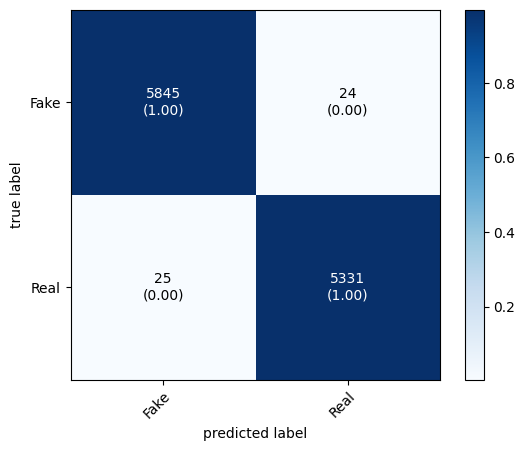

In [16]:
y_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

In [17]:
# Dimensionality and density of features

print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 108572
Density (i.e., fraction of non-zero elements): 0.514


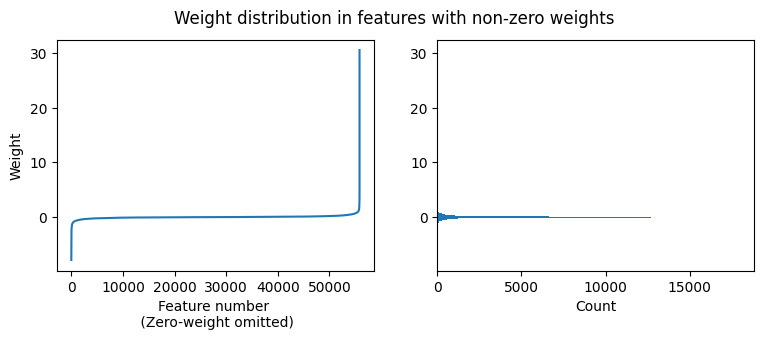

In [18]:
# Sort non-zero weights
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

# Plot
fig, axs = plt.subplots(1,2, figsize=(9,3))

sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')

axs[1].hist(weights_nonzero_sorted,
            orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle('Weight distribution in features with non-zero weights')

plt.show()

In [19]:
# Sort features by their associated weights
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[pa_clf.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
    'Token': fake_indicator_tokens,
    'Weight': weights_nonzero_sorted[:num_tokens]
})

real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-7.838944
1,image,-7.521656
2,featured,-7.392600
3,gop,-5.646193
4,just,-5.555280
5,getty,-5.450060
6,sen,-4.529639
7,watch,-4.357679
8,rep,-4.251596
9,hillary,-4.154070




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,30.523800
1,nov,5.119963
2,washington,4.191337
3,wednesday,4.141310
4,republican,3.939896
5,thursday,3.661277
6,tuesday,3.615745
7,friday,3.266329
8,showed,3.179166
9,comment,3.047394


In [20]:
fake_contain_fake = fake.text.loc[[np.any([token in body for token in fake_indicator.Token])
                                for body in fake.text.str.lower()]]
real_contain_real = real.text.loc[[np.any([token in body for token in real_indicator.Token])
                                for body in real.text.str.lower()]]

print('Articles that contained any of the matching indicator tokens:\n')

print('FAKE: {} out of {} ({:.2f}%)'
      .format(len(fake_contain_fake), len(fake), len(fake_contain_fake)/len(fake) * 100))
print(fake_contain_fake)

print('\nREAL: {} out of {} ({:.2f}%)'
      .format(len(real_contain_real), len(real), len(real_contain_real)/len(real) * 100))
print(real_contain_real)

Articles that contained any of the matching indicator tokens:

FAKE: 21408 out of 23481 (91.17%)
0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 21408, dtype: object

REAL: 21408 out of 21417 (99.96%)
0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3

In [17]:
# def FakeNewsDetection(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
#     # vectorizer
#     my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
#     tfidf_train = my_tfidf.fit_transform(X_train)
#     tfidf_test = my_tfidf.transform(X_test)
    
#     # model
#     my_pac = PassiveAggressiveClassifier(max_iter=50)
#     my_pac.fit(tfidf_train, y_train)
#     y_pred = my_pac.predict(tfidf_test)
    
#     # metrics
#     conf_mat = confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(conf_mat,
#                           show_normed=True, colorbar=True)
    
#     accscore = accuracy_score(y_test, y_pred)
#     f1score = f1_score(y_test,y_pred,pos_label='real')

#     print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
#     print('The F1 score is {:.3f}.\n'.format(f1score))
    
#     # Sort non-zero weights
#     weights_nonzero = my_pac.coef_[my_pac.coef_!=0]
#     feature_sorter_nonzero = np.argsort(weights_nonzero)
#     weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
    
#     # Sort features by their associated weights
#     tokens = my_tfidf.get_feature_names()
#     tokens_nonzero = np.array(tokens)[my_pac.coef_[0]!=0]
#     tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

#     num_tokens = 10
#     fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
#     real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

#     fake_indicator = pd.DataFrame({
#         'Token': fake_indicator_tokens,
#         'Weight': weights_nonzero_sorted[:num_tokens]
#     })

#     real_indicator = pd.DataFrame({
#         'Token': real_indicator_tokens,
#         'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
#     })

#     print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
#     display(fake_indicator)

#     print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
#     display(real_indicator)

In [18]:
# # Generate a copy of the "real news" dataset and remove headings f

# real_copy = real.copy()
# for i,body in real.text.items():
#     if '(reuters)' in body.lower():
#         idx = body.lower().index('(reuters)') + len('(reuters) - ')
#         real_copy.text.iloc[i] = body[idx:]
        
# real_copy.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real


The accuracy of prediction is 98.65%.

The F1 score is 0.986.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,featured,-10.133028
1,read,-9.781274
2,image,-9.266138
3,gop,-7.979427
4,getty,-7.116200
5,com,-6.679261
6,sen,-6.083587
7,just,-5.996633
8,watch,-5.988208
9,rep,-5.681019




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,wednesday,7.853470
1,tuesday,7.572836
2,thursday,7.116746
3,friday,6.339528
4,nov,6.100257
5,reuters,6.047050
6,monday,5.386156
7,republican,5.087551
8,reporters,4.495630
9,spokeswoman,4.481229


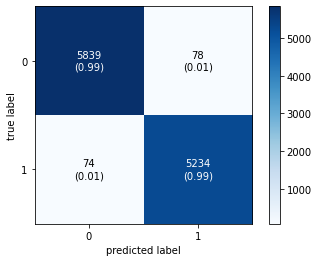

In [19]:
# # Create new data, and run the algorithm
# data2 = pd.concat([fake, real_copy], axis=0)
# data2 = data2.sample(frac=1).reset_index(drop=True)
# data2.drop('subject', axis=1)

# FakeNewsDetection(data2['text'], data2['label'])

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [36]:
news = [input()]
tfidf_test = my_tfidf.transform(news)
print()
print(pa_clf.predict(tfidf_test))


['real']


In [31]:
import numpy as np
import joblib

In [32]:
filename = 'model.sav'
joblib.dump(pa_clf, filename)

['model.sav']

In [41]:
filename = 'vectorizer.sav'
joblib.dump(my_tfidf, filename)

['vectorizer.sav']

In [43]:
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

loaded_model = joblib.load('model.sav')
tfidf_vectorizer = joblib.load('vectorizer.sav')

# my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

news = [input()]
tfidf_test = tfidf_vectorizer.transform(news)
print()
print(loaded_model.predict(tfidf_test))


['fake']
